In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/b2/scratch/ahringer/jj374/lab/relmapping


In [2]:
step_htseq = 'trim20.bwa_pe.rm_unmapped_pe.rm_chrM.rm_rRNA_broad.rm_blacklist.rm_q10.htseq_counts'

def counts_(sample):
    return pd.read_csv(pf('lcap805_' + sample, step_htseq, '.tsv', 'lcap805'), sep='\t', names=('gene_id', sample), index_col='gene_id')

l_lcap = config['stages_rep']

df808 = pd.concat(
    [counts_(sample) for sample in l_lcap],
    axis=1,
).drop(['__no_feature', '__ambiguous', '__too_low_aQual', '__not_aligned', '__alignment_not_unique'])
df808.tail(5)

,wt_emb_rep1,wt_emb_rep2,wt_l1_rep1,wt_l1_rep2,wt_l2_rep1,wt_l2_rep2,wt_l3_rep1,wt_l3_rep2,wt_l4_rep1,wt_l4_rep2,...,glp1_d1_rep1,glp1_d1_rep2,glp1_d2_rep1,glp1_d2_rep2,glp1_d6_rep1,glp1_d6_rep2,glp1_d9_rep1,glp1_d9_rep2,glp1_d13_rep1,glp1_d13_rep2
gene_id,,,,,,,,,,,,,,,,,,,,,
WBGene00271701,4,5,54,51,88,94,22,9,6,17,...,17,23,9,27,4,29,4,6,10,13
WBGene00271703,0,0,0,0,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
WBGene00271706,78,53,12,17,10,8,34,14,34,82,...,0,5,7,6,5,2,4,0,3,2
WBGene00271707,0,0,2,0,1,0,0,1,0,0,...,0,0,0,2,0,2,0,0,3,1
WBGene00271715,37,25,161,163,282,116,123,59,14,31,...,70,47,125,37,53,101,24,36,61,48


Text(0.5,0,'Correlation distance')

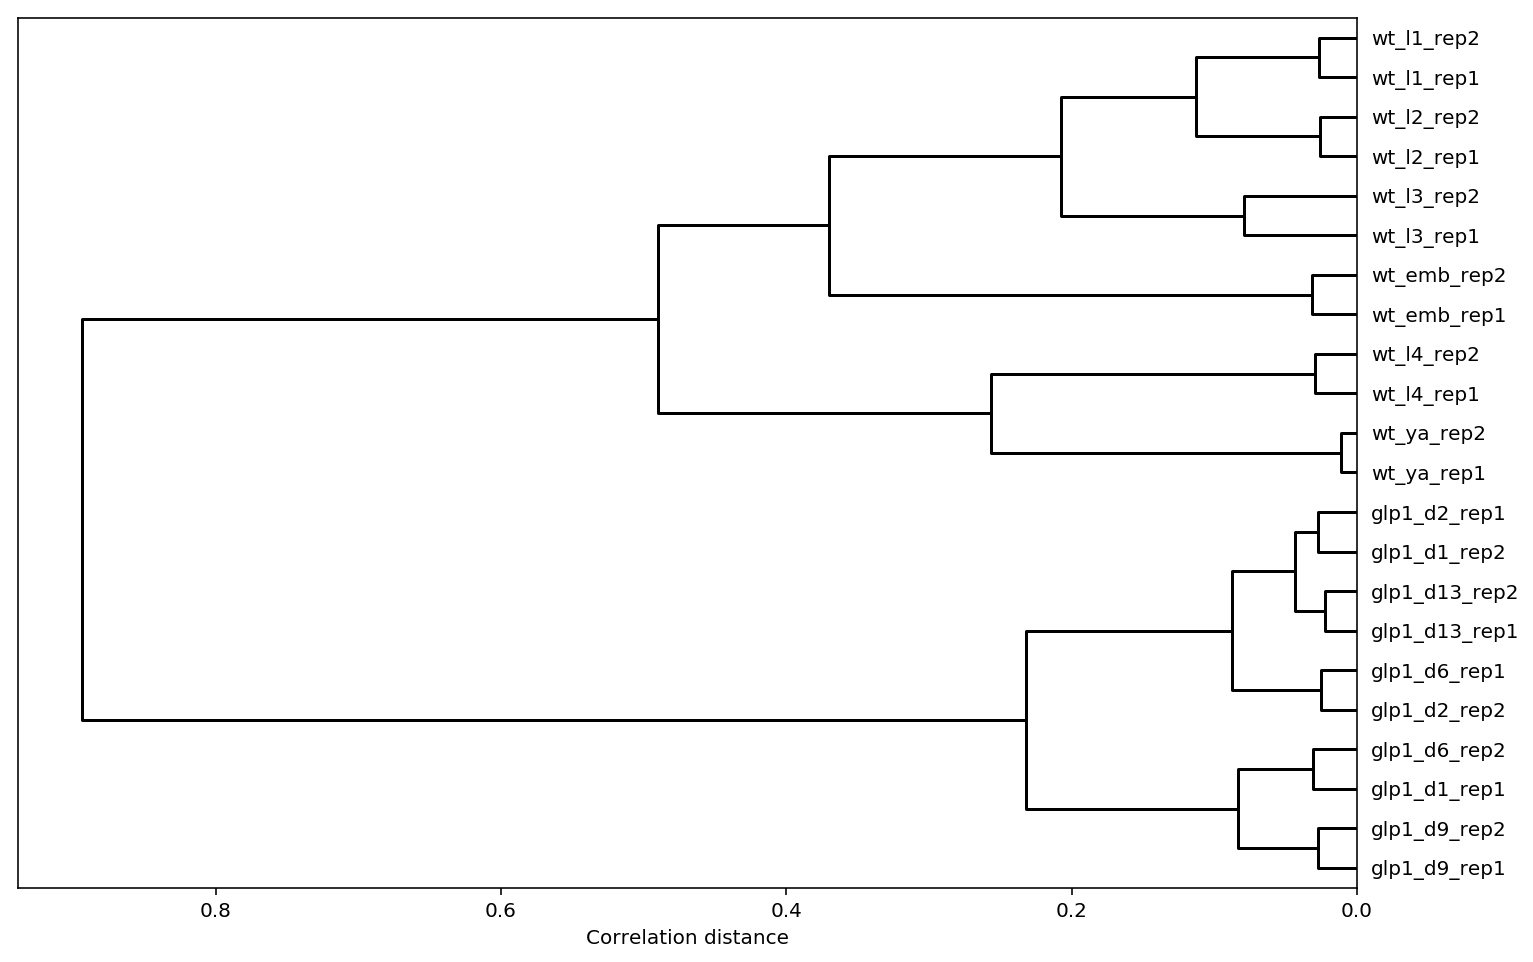

In [3]:
df808_top10k = df808.loc[(df808.sum(axis=1).rank(ascending=False)) < 10000]
linkage_matrix = sp.cluster.hierarchy.linkage(np.log2(df808_top10k.values.T + 1), metric='correlation', method='complete')
plt.figure(figsize=(12,8))
r=sp.cluster.hierarchy.dendrogram(linkage_matrix, labels=df808_top10k.columns, orientation='left', 
                                  color_threshold=-1.0, above_threshold_color='k')
plt.gca().set_xlabel('Correlation distance')

In [4]:
def counts_(sample):
    return pd.read_csv(pf('lcap728_' + sample, step_htseq, '.tsv', 'lcap728'), sep='\t', names=('gene_id', sample), index_col='gene_id')

l_lcap = [
    'wt_emb_rep1',
    'wt_emb_rep2',
    'wt_l1_rep1',
    'wt_l1_rep2',
    'wt_l2_rep1',
    'wt_l2_rep2',
    'wt_l3_rep1',
    'wt_l3_rep2',
    'wt_l4_rep1',
    'wt_l4_rep2',
    'wt_ya_rep1',
    'wt_ya_rep2',
    'glp1_ya_rep1',
    'glp1_ya_rep2',
    'glp1_d3_rep1',
    'glp1_d3_rep2',
    'glp1_d7_rep1',
    'glp1_d7_rep2',
    'glp1_d10_rep1',
    'glp1_d10_rep2',
    'glp1_d14_rep1',
    'glp1_d14_rep2',
]

df728 = pd.concat(
    [counts_(sample) for sample in l_lcap],
    axis=1,
).drop(['__no_feature', '__ambiguous', '__too_low_aQual', '__not_aligned', '__alignment_not_unique'])
df728.tail(5)

,wt_emb_rep1,wt_emb_rep2,wt_l1_rep1,wt_l1_rep2,wt_l2_rep1,wt_l2_rep2,wt_l3_rep1,wt_l3_rep2,wt_l4_rep1,wt_l4_rep2,...,glp1_ya_rep1,glp1_ya_rep2,glp1_d3_rep1,glp1_d3_rep2,glp1_d7_rep1,glp1_d7_rep2,glp1_d10_rep1,glp1_d10_rep2,glp1_d14_rep1,glp1_d14_rep2
gene_id,,,,,,,,,,,,,,,,,,,,,
WBGene00271701,4,5,54,51,88,94,22,9,6,17,...,30,20,42,33,19,12,18,13,29,12
WBGene00271703,0,0,0,0,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
WBGene00271706,78,53,12,17,10,8,34,14,34,82,...,10,8,7,4,6,10,4,13,9,4
WBGene00271707,0,0,2,0,1,0,0,1,0,0,...,0,0,1,0,5,7,2,3,2,2
WBGene00271715,37,25,161,163,282,116,123,59,14,31,...,140,79,60,36,93,115,73,123,43,70


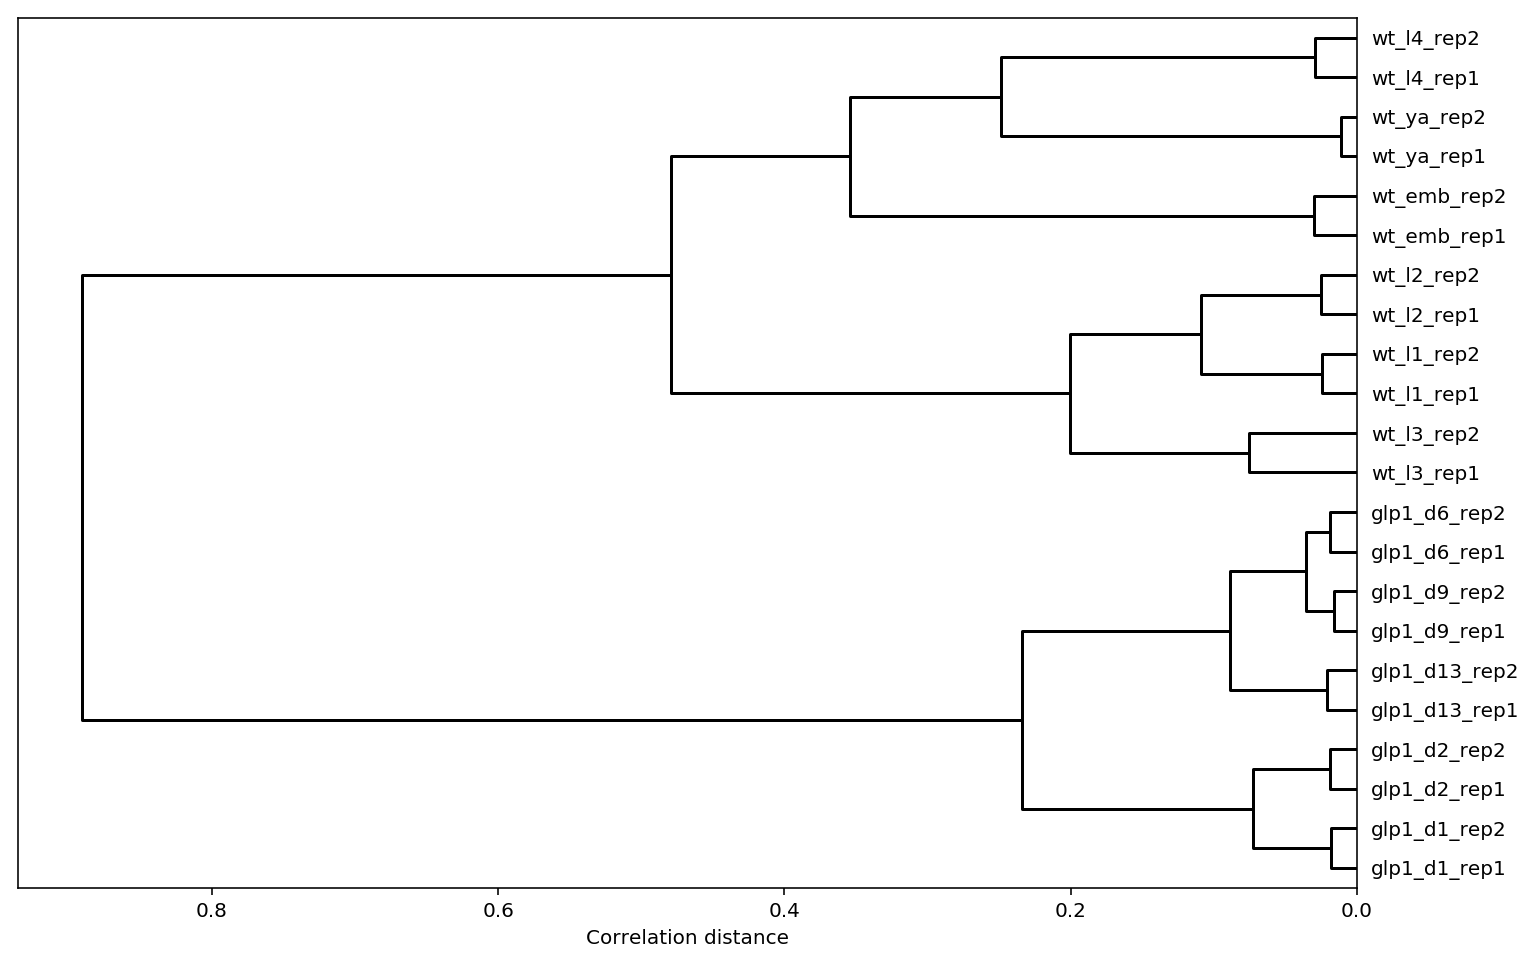

In [5]:
l_lcap728_display = [
    'wt_emb_rep1',
    'wt_emb_rep2',
    'wt_l1_rep1',
    'wt_l1_rep2',
    'wt_l2_rep1',
    'wt_l2_rep2',
    'wt_l3_rep1',
    'wt_l3_rep2',
    'wt_l4_rep1',
    'wt_l4_rep2',
    'wt_ya_rep1',
    'wt_ya_rep2',
    'glp1_d1_rep1',
    'glp1_d1_rep2',
    'glp1_d2_rep1',
    'glp1_d2_rep2',
    'glp1_d6_rep1',
    'glp1_d6_rep2',
    'glp1_d9_rep1',
    'glp1_d9_rep2',
    'glp1_d13_rep1',
    'glp1_d13_rep2',
]

df728_top10k = df728.loc[(df728.sum(axis=1).rank(ascending=False)) < 10000]
linkage_matrix = sp.cluster.hierarchy.linkage(np.log2(df728_top10k.values.T + 1), metric='correlation', method='complete')
plt.figure(figsize=(12,8))
r=sp.cluster.hierarchy.dendrogram(linkage_matrix, labels=l_lcap728_display, orientation='left', 
                                  color_threshold=-1.0, above_threshold_color='k')
plt.gca().set_xlabel('Correlation distance')
plt.savefig('annot/FigA_clustering/reproducibility_lcap.pdf', bbox_inches='tight')

In [6]:
df728_glp1 = df728[df728.columns[12:]]
df728_glp1.columns = ('lcap728_' + col for col in df728_glp1.columns)

df808_glp1 = df808[df808.columns[12:]]
df808_glp1.columns = ('lcap808_' + col for col in df808_glp1.columns)

Text(0.5,0,'Correlation distance')

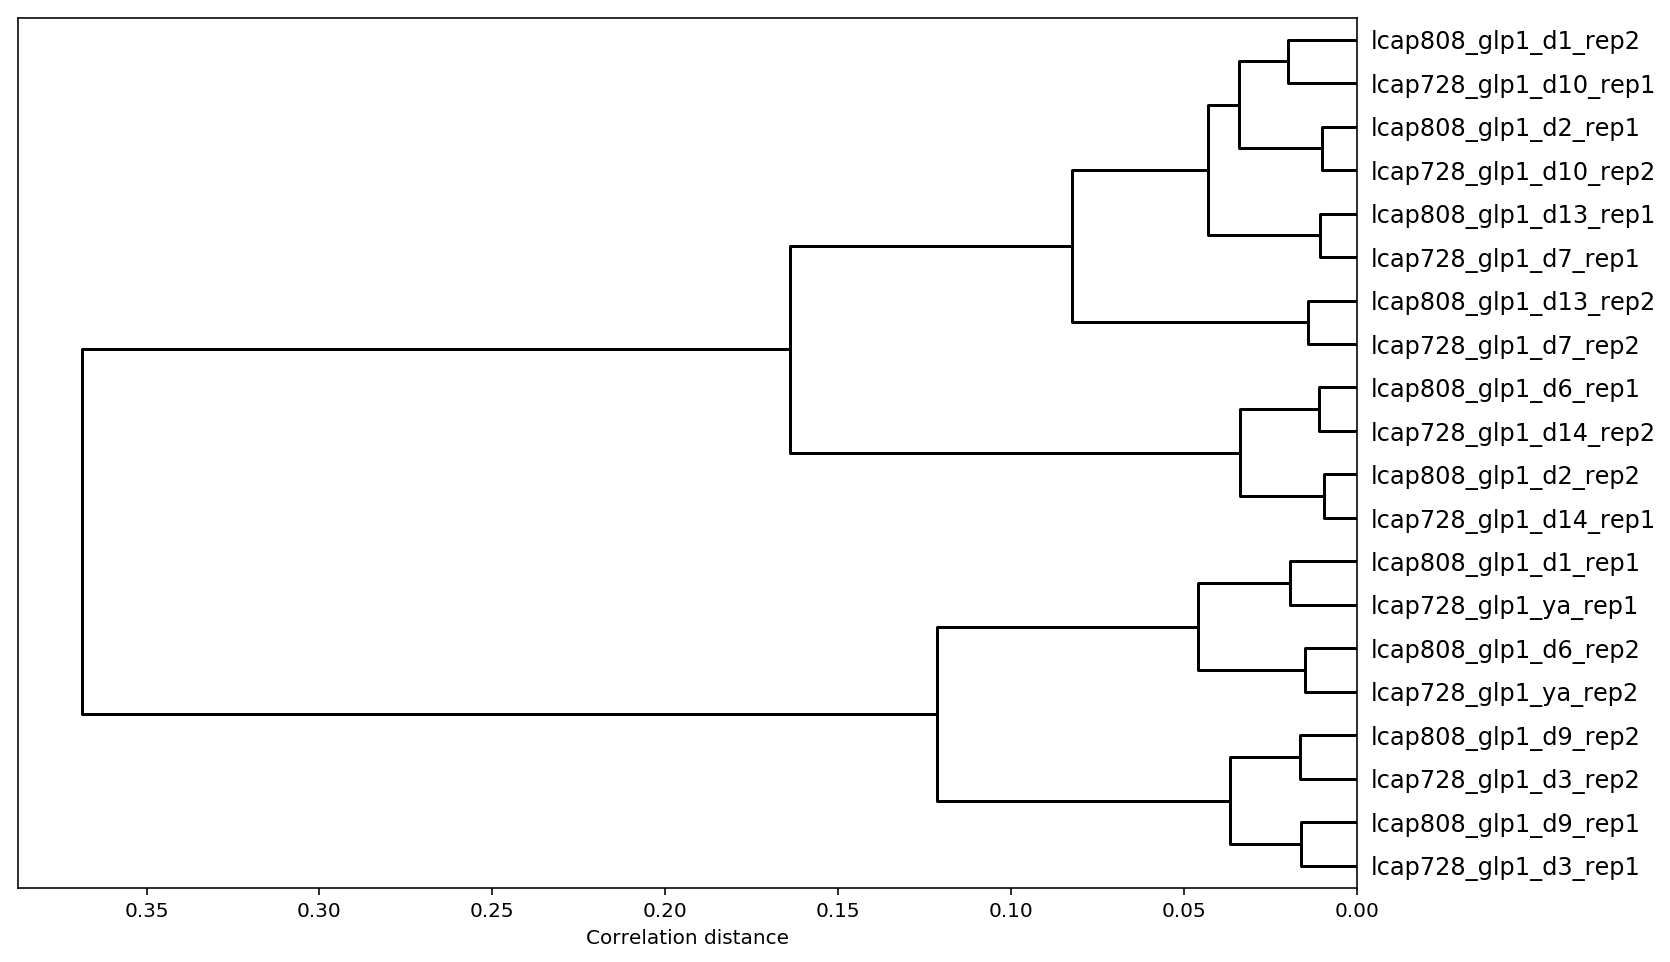

In [7]:
df_glp1 = pd.concat([df728_glp1, df808_glp1], axis=1)
df_glp1_top10k = df_glp1.loc[(df_glp1.sum(axis=1).rank(ascending=False)) < 10000]
linkage_matrix = sp.cluster.hierarchy.linkage(np.log2(df_glp1_top10k.values.T + 1), metric='correlation', method='complete')
plt.figure(figsize=(12,8))
r=sp.cluster.hierarchy.dendrogram(linkage_matrix, labels=df_glp1_top10k.columns, orientation='left', 
                                  color_threshold=-1.0, above_threshold_color='k')
plt.gca().set_xlabel('Correlation distance')

In [8]:
d_ = {
    'wt_emb_rep1': 'wt_emb_rep1',
    'wt_emb_rep2': 'wt_emb_rep2', 
    'wt_l1_rep1': 'wt_l1_rep1',
    'wt_l1_rep2': 'wt_l1_rep2', 
    'wt_l2_rep1': 'wt_l2_rep1',
    'wt_l2_rep2': 'wt_l2_rep2',
    'wt_l3_rep1': 'wt_l3_rep1',
    'wt_l3_rep2': 'wt_l3_rep2',
    'wt_l4_rep1': 'wt_l4_rep1',
    'wt_l4_rep2': 'wt_l4_rep2',
    'wt_ya_rep1': 'wt_ya_rep1',
    'wt_ya_rep2': 'wt_ya_rep2',
    'glp1_d1_rep1': 'glp1_d1_rep1',
    'glp1_d1_rep2': 'glp1_d9_rep1',
    'glp1_d2_rep1': 'glp1_d9_rep2',
    'glp1_d2_rep2': 'glp1_d13_rep1',
    'glp1_d6_rep1': 'glp1_d13_rep2',
    'glp1_d6_rep2': 'glp1_d1_rep2',
    'glp1_d9_rep1': 'glp1_d2_rep1',
    'glp1_d9_rep2': 'glp1_d2_rep2',
    'glp1_d13_rep1': 'glp1_d6_rep1',
    'glp1_d13_rep2': 'glp1_d6_rep2',
}

df808_inferred = df808.copy()
df808_inferred.columns = (d_[col] for col in df808_inferred.columns)

Text(0.5,0,'Correlation distance')

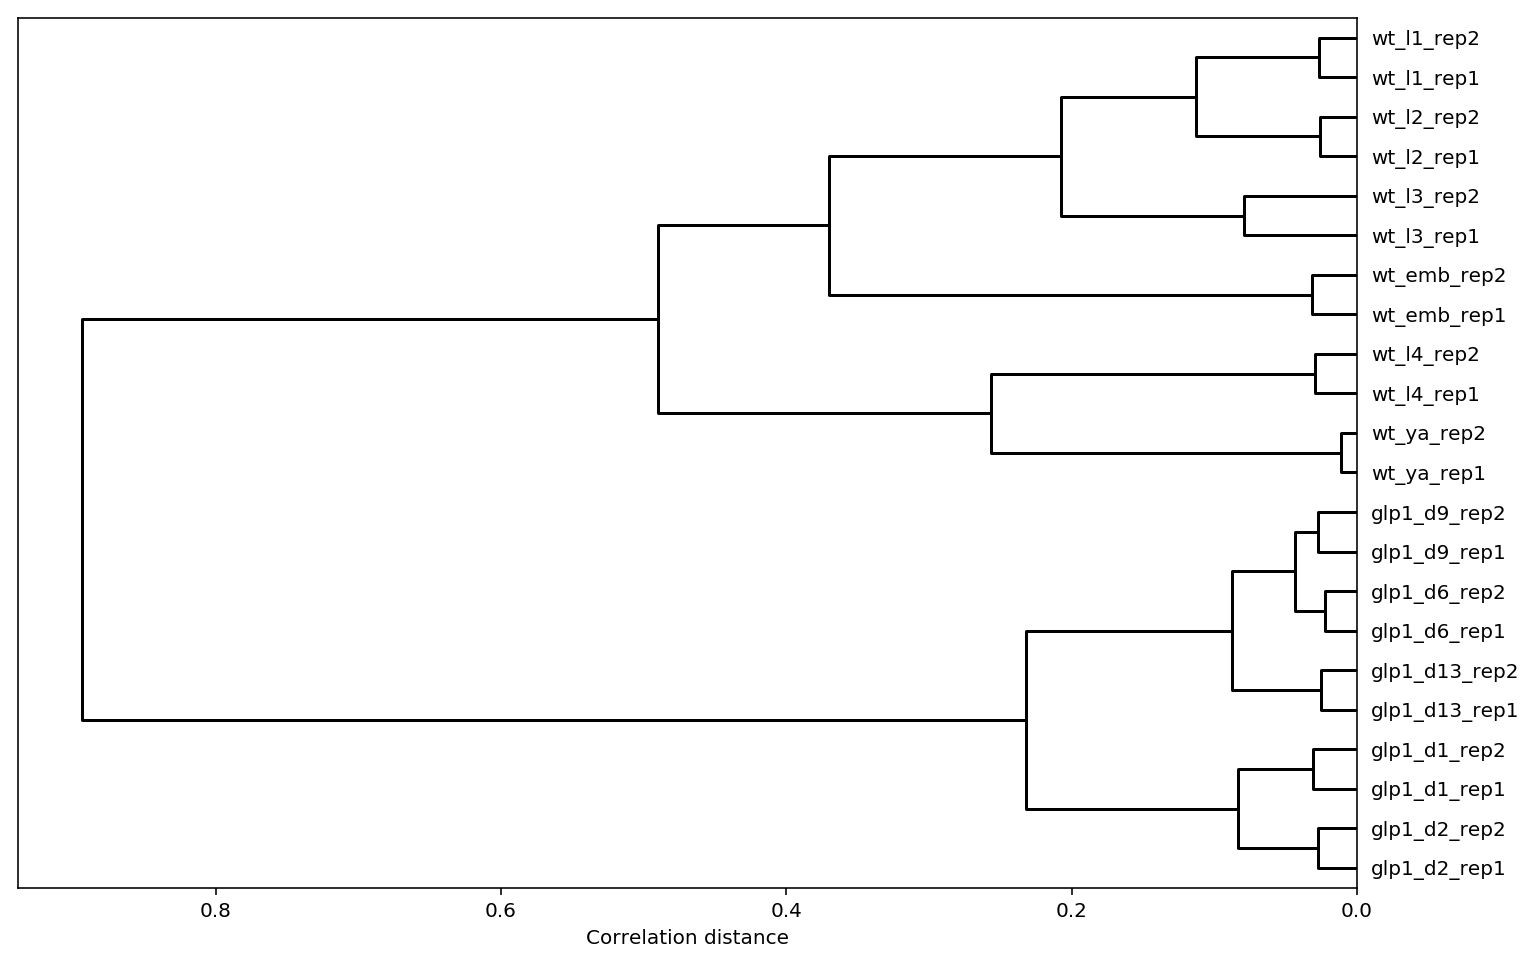

In [9]:
df808_inferred_top10k = df808_inferred.loc[(df808_inferred.sum(axis=1).rank(ascending=False)) < 10000]
linkage_matrix = sp.cluster.hierarchy.linkage(np.log2(df808_inferred_top10k.values.T + 1), metric='correlation', method='complete')
plt.figure(figsize=(12,8))
r=sp.cluster.hierarchy.dendrogram(linkage_matrix, labels=df808_inferred_top10k.columns, orientation='left', 
                                  color_threshold=-1.0, above_threshold_color='k')
plt.gca().set_xlabel('Correlation distance')

In [10]:
def counts_(sample):
    return pd.read_csv(pf(sample, step_htseq, '.tsv', 'lcap'), sep='\t', names=('gene_id', sample), index_col='gene_id')

df_HS569 = pd.concat(
    [counts_(sample) for sample in config['lcap_HS569']],
    axis=1,
).drop(['__no_feature', '__ambiguous', '__too_low_aQual', '__not_aligned', '__alignment_not_unique'])
df_HS569.tail(5)

,HS569_lcRNA_glp1_P15_D3,HS569_lcRNA_glp1_P15_YA,HS569_lcRNA_glp1_P22_D10,HS569_lcRNA_glp1_P22_D14,HS569_lcRNA_glp1_P22_D3,HS569_lcRNA_glp1_P22_D7,HS569_lcRNA_glp1_P22_YA,HS569_lcRNA_glp1_P39_D10,HS569_lcRNA_glp1_P39_D14,HS569_lcRNA_glp1_P39_D7
gene_id,,,,,,,,,,
WBGene00271701,9,17,4,10,27,4,23,6,13,29
WBGene00271703,0,0,0,0,0,0,0,0,0,0
WBGene00271706,7,0,4,3,6,5,5,0,2,2
WBGene00271707,0,0,0,3,2,0,0,0,1,2
WBGene00271715,125,70,24,61,37,53,47,36,48,101


Text(0.5,0,'Correlation distance')

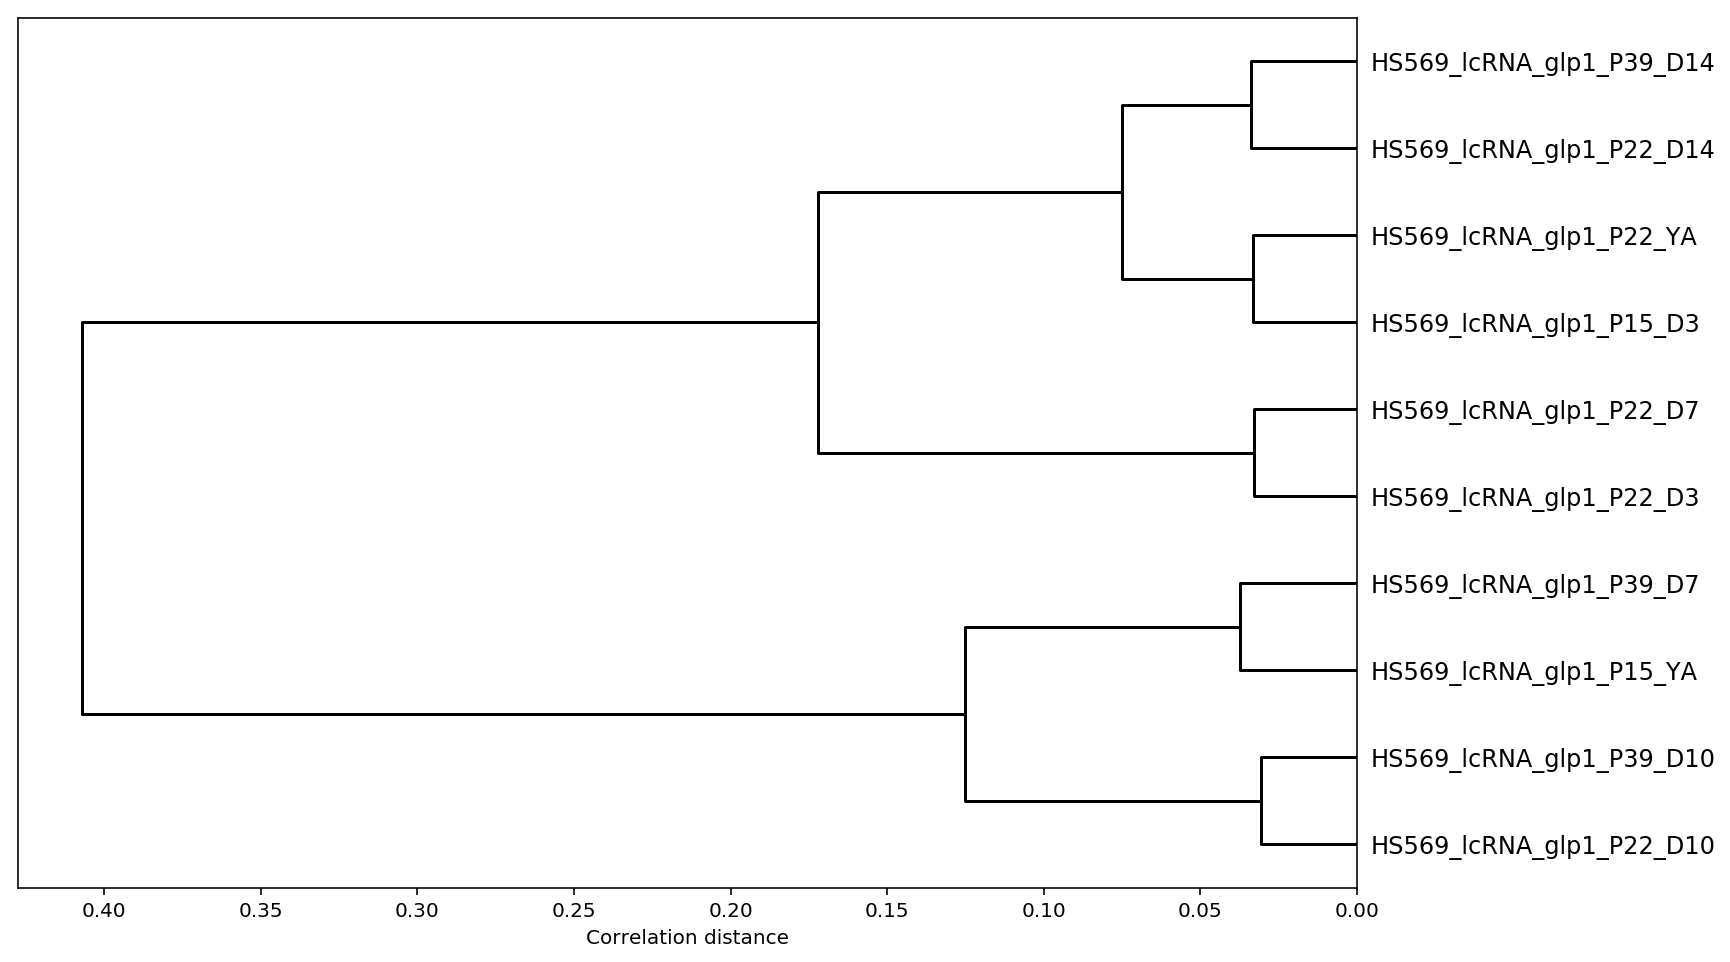

In [11]:
df_HS569_top10k = df_HS569.loc[(df_HS569.sum(axis=1).rank(ascending=False)) < 9000]
linkage_matrix = sp.cluster.hierarchy.linkage(np.log2(df_HS569_top10k.values.T + 1), metric='correlation', method='complete')
plt.figure(figsize=(12,8))
r=sp.cluster.hierarchy.dendrogram(linkage_matrix, labels=df_HS569_top10k.columns, orientation='left', 
                                  color_threshold=-1.0, above_threshold_color='k')
plt.gca().set_xlabel('Correlation distance')